In [1]:
%matplotlib inline

In [2]:
import dolfin as df
import mshr
import numpy as np
from Plot_vtk_matplotlib import *
from Plot_vtk_matplotlib import plot_vtk_matplotlib as pvm

In [4]:
mesh = mshr.Rectangle(df.Point(-3, -3), df.Point(3, 3))
mesh = mshr.generate_mesh(mesh, 10)
vspace = df.VectorFunctionSpace(mesh, 'Lagrange', degree=1, dim=2)
vfunction = df.Expression(("sin(x[1])", "cos(x[0])"))
vfunction = df.interpolate(vfunction, vspace)
# df.plot(vfunction, interactive=True)

DEBUG:FFC:Reusing form from cache.


In [5]:
_file = df.File('dolfin_vector_field_2d.pvd')
_file << vfunction

In [6]:
# Load our skyrmionic state
vf_plot = pvm('./dolfin_vector_field_2d000000.vtu',
                                  z_max=1, z_min=-1,
                                  )
# Extract the data from the file
vf_plot.extract_data(# vtkfiletype=XMLStructuredGrid
                     )

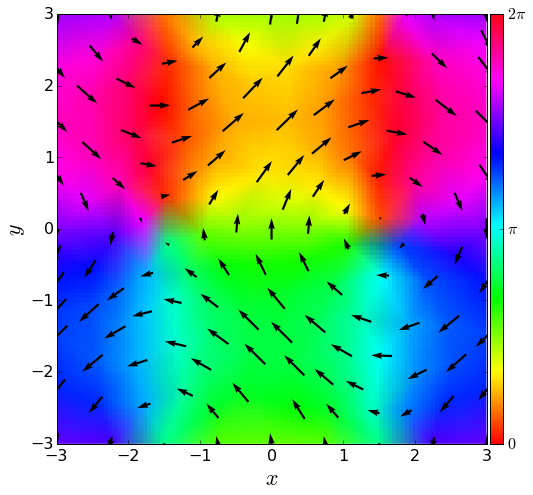

In [7]:
# Plot the y component and arrows in black
vf_plot.plot_vtk(-3, 3,
                -3, 3,
                # nx=50, ny=50,
                v_component='vy',
                hsv_map='2d',
                # figsize=(10, 10),
                # savefig='hsv_map.pdf',
                colorbar=True,
                quiver_type='raw_colour',
                )

/usr/local/lib/python2.7/dist-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


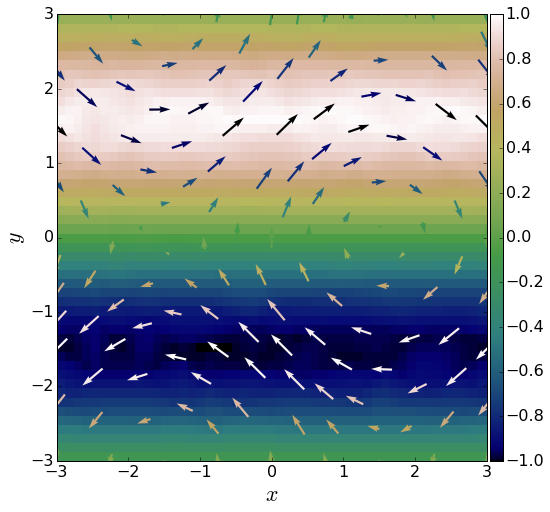

In [12]:

# Plot the y component and arrows in black
vf_plot.plot_vtk(-3, 3,
                -3, 3,
                nx=50, ny=50,
                v_component='vx', 
                # cmap='RdBu',
                interpolator='natgrid',
                interpolator_method='linear', 
                # figsize=(10, 10),
                colorbar=True,
                # quiver_type='raw_colour',
                )

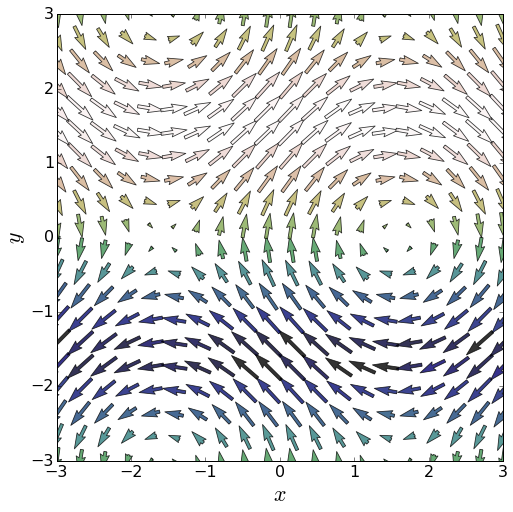

In [13]:

# Quiver plot
vf_plot.plot_quiver(quiver_type='interpolated_cmap',
                    x_min=-3, x_max=3,
                    y_min=-3, y_max=3,
                    linewidth=0.8, 
                    scale=1 / 0.06,
                    width=0.007,
                    alpha=0.8,
                    v_component='vx',
                    # pivot='tail'
                    # savefig='vector_field.png'
                    )

In [10]:
mesh = mshr.Sphere(df.Point(0, 0), 5)
mesh = mshr.generate_mesh(mesh, 10)

vspace = df.VectorFunctionSpace(mesh, 'Lagrange', degree=1, dim=3)

vfunction = df.Expression(("sin(x[1])", "cos(x[0])", "sin(x[2])"))
vfunction = df.interpolate(vfunction, vspace)

# We can plot the field using Dolfin 
# df.plot(vfunction, interactive=True)

# We can plot the mesh
# df.plot(mesh, interactive=True)

DEBUG:FFC:Reusing form from cache.


In [15]:
_file = df.File('dolfin_sphere_vector_field_3d.pvd')
_file << vfunction

In [16]:

# Load our skyrmionic state
vf_plot = pvm('./dolfin_sphere_vector_field_3d000000.vtu',
                                  z_max=0.8, z_min=-0.8)
# Extract the data from the file
vf_plot.extract_data()

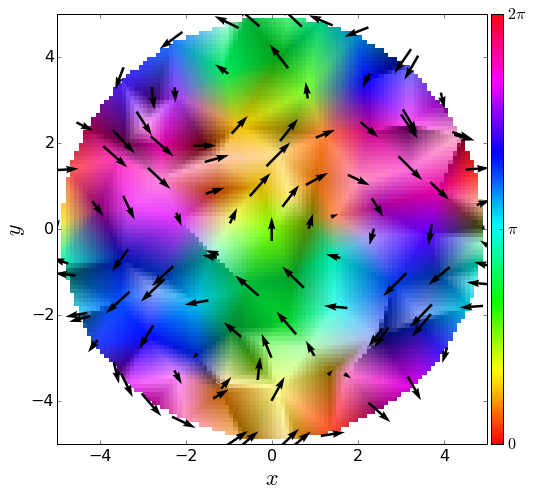

In [17]:

# plot the x component and arrows in black
vf_plot.plot_vtk(-5, 5,
                -5, 5,
                nx=100, ny=100,
                v_component='vz',
                hsv_map='3d',
                # figsize=(10, 8),
                colorbar=True,
                quiver_type='raw_colour', 
                )

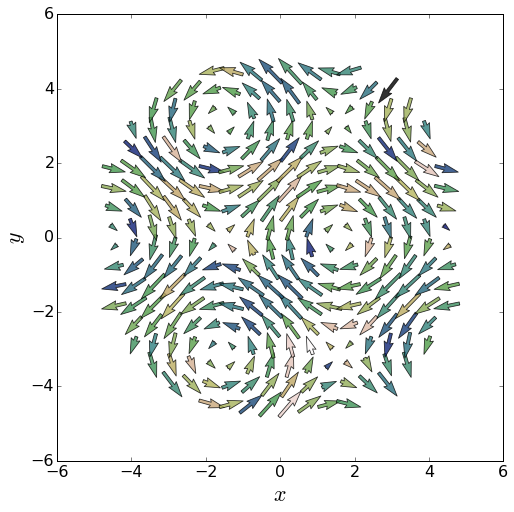

In [18]:
# Quiver plot
vf_plot.plot_quiver(quiver_type='interpolated_cmap',
                    x_min=-5, x_max=5,
                    y_min=-5, y_max=5,
                    linewidth=0.8, 
                    scale=1 / 0.06,
                    width=0.007,
                    alpha=0.8,
                    v_component='vz'
                    )